In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 1.3MB/s 
     |████████████████████████████████| 6.8MB 43.9MB/s 
     |████████████████████████████████| 983kB 53.0MB/s 
     |████████████████████████████████| 266kB 58.4MB/s 
     |████████████████████████████████| 1.3MB 43.3MB/s 
     |████████████████████████████████| 1.2MB 50.4MB/s 
     |████████████████████████████████| 471kB 58.0MB/s 
     |████████████████████████████████| 2.9MB 48.2MB/s 
     |████████████████████████████████| 890kB 53.5MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.4-cp36-none-any.whl size=25276443 sha256=9316b85669f75c64dfa4e88fee6899bfecb08d419406f3ecadef04566966d5be
  Stored in directory: /root/.cache/pip/wheels/1b/77/8a/bdceaabc308e7178d575278bf6143b7d1a9b939a1e40c56b88
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=670cbd93afd28ee1f6f39bd2e84f2c6d4e49941ec16f0b400bbf3f74b9ca5191
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [2]:
import ktrain
from ktrain import text

## Loading data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls /content/drive/MyDrive/Uni_Köln/Masterarbeit/Model/KERAS/GeneratedFiles2/

test/  train/


In [5]:
%%time
trn, val, preproc = text.texts_from_folder("/content/drive/MyDrive/Masterarbeit/GeneratedTXT_Files/Ablation01/", 
                                           max_features=20000, maxlen=512, 
                                           ngram_range=1, 
                                           preprocess_mode='standard',
                                           classes=['central', 'rechts', 'links'])

detected encoding: utf-8
language: de
Word Counts: 314373
Nrows: 14400
14400 train sequences
train sequence lengths:
	mean : 429
	95percentile : 1270
	99percentile : 2599
x_train shape: (14400,512)
y_train shape: (14400, 3)
Is Multi-Label? False
3600 test sequences
test sequence lengths:
	mean : 429
	95percentile : 1248
	99percentile : 2716
x_test shape: (3600,512)
y_test shape: (3600, 3)
CPU times: user 19.7 s, sys: 2.77 s, total: 22.4 s
Wall time: 56min 23s


## Inspection of available classifiers

In [6]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


### Applying the fasttext model (mod_17):

In [7]:
fasttext = text.text_classifier("fasttext", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [8]:
learner_ft = ktrain.get_learner(fasttext, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
450/450 [==============================] - 9s 15ms/step - loss: 1.4984 - accuracy: 0.3368
Epoch 2/5
450/450 [==============================] - 7s 14ms/step - loss: 1.5113 - accuracy: 0.3340
Epoch 3/5
450/450 [==============================] - 7s 15ms/step - loss: 1.3850 - accuracy: 0.3452
Epoch 4/5
450/450 [==============================] - 7s 14ms/step - loss: 1.0677 - accuracy: 0.4298
Epoch 5/5
450/450 [==============================] - 5s 10ms/step - loss: 58.9653 - accuracy: 0.3286


done.
Visually inspect loss plot and select learning rate associated with falling loss


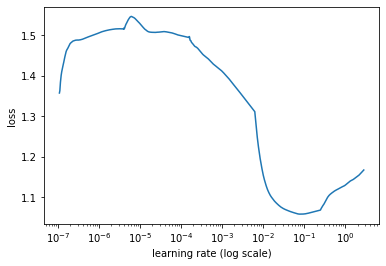

In [9]:
learner_ft.lr_find(show_plot=True, max_epochs=5)

In [10]:
learner_ft.lr_estimate()

(0.0050170063, 0.008049673587083816)

In [11]:
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 8s 17ms/step - loss: 1.1136 - accuracy: 0.3930 - val_loss: 1.0057 - val_accuracy: 0.5289
Epoch 2/5
450/450 [==============================] - 7s 16ms/step - loss: 0.9868 - accuracy: 0.5119 - val_loss: 0.8810 - val_accuracy: 0.6103
Epoch 3/5
450/450 [==============================] - 7s 15ms/step - loss: 0.9111 - accuracy: 0.5723 - val_loss: 0.8008 - val_accuracy: 0.6542
Epoch 4/5
450/450 [==============================] - 7s 15ms/step - loss: 0.8402 - accuracy: 0.6272 - val_loss: 0.7550 - val_accuracy: 0.6825
Epoch 5/5
450/450 [==============================] - 7s 15ms/step - loss: 0.7704 - accuracy: 0.6682 - val_loss: 0.7377 - val_accuracy: 0.6936


In [12]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 7s 16ms/step - loss: 0.7291 - accuracy: 0.6885 - val_loss: 0.7152 - val_accuracy: 0.6997
Epoch 2/5
450/450 [==============================] - 7s 15ms/step - loss: 0.6883 - accuracy: 0.7153 - val_loss: 0.6911 - val_accuracy: 0.6986
Epoch 3/5
450/450 [==============================] - 7s 16ms/step - loss: 0.6447 - accuracy: 0.7285 - val_loss: 0.6970 - val_accuracy: 0.7103
Epoch 4/5
450/450 [==============================] - 7s 15ms/step - loss: 0.6329 - accuracy: 0.7414 - val_loss: 0.6799 - val_accuracy: 0.7233
Epoch 5/5
450/450 [==============================] - 7s 15ms/step - loss: 0.6069 - accuracy: 0.7515 - val_loss: 0.6615 - val_accuracy: 0.7153


In [13]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5769 - accuracy: 0.7616 - val_loss: 0.6667 - val_accuracy: 0.7158
Epoch 2/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5657 - accuracy: 0.7704 - val_loss: 0.6378 - val_accuracy: 0.7353
Epoch 3/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5474 - accuracy: 0.7779 - val_loss: 0.6862 - val_accuracy: 0.7356
Epoch 4/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5299 - accuracy: 0.7862 - val_loss: 0.6489 - val_accuracy: 0.7344
Epoch 5/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5189 - accuracy: 0.7951 - val_loss: 0.6801 - val_accuracy: 0.7294


In [14]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5103 - accuracy: 0.8028 - val_loss: 0.6976 - val_accuracy: 0.7075
Epoch 2/5
450/450 [==============================] - 7s 16ms/step - loss: 0.4915 - accuracy: 0.8056 - val_loss: 0.6530 - val_accuracy: 0.7553
Epoch 3/5
450/450 [==============================] - 7s 16ms/step - loss: 0.4854 - accuracy: 0.8115 - val_loss: 0.6323 - val_accuracy: 0.7619
Epoch 4/5
450/450 [==============================] - 7s 16ms/step - loss: 0.4631 - accuracy: 0.8194 - val_loss: 0.6572 - val_accuracy: 0.7464
Epoch 5/5
450/450 [==============================] - 7s 16ms/step - loss: 0.4617 - accuracy: 0.8217 - val_loss: 0.6792 - val_accuracy: 0.7214


## Applying the logreg model: (mod_18)

In [15]:
logreg = text.text_classifier("logreg", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [16]:
learner_log = ktrain.get_learner(logreg, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1090 - accuracy: 0.3539
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1115 - accuracy: 0.3439
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1011 - accuracy: 0.3551
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 1.0611 - accuracy: 0.4298
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.9089 - accuracy: 0.6504
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.6275 - accuracy: 0.7978
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.5552 - accuracy: 0.8236
Epoch 8/10
450/450 [==============================] - 0s 701us/step - loss: 1.9285 - accuracy: 0.7423


done.
Visually inspect loss plot and select learning rate associated with falling loss


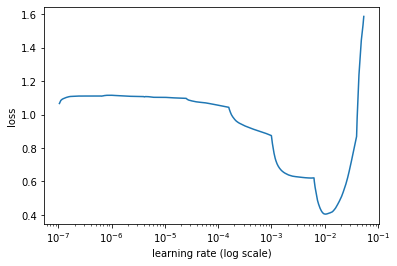

In [17]:
learner_log.lr_find(show_plot=True, max_epochs=10)

In [18]:
learner_log.lr_estimate()

(0.0055349097, 0.0010311760939657687)

In [19]:
learner_log.fit(learner_log.lr_estimate()[1], 10)

Epoch 1/10
450/450 [==============================] - 2s 5ms/step - loss: 0.8215 - accuracy: 0.6446 - val_loss: 0.6963 - val_accuracy: 0.7267
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4896 - accuracy: 0.8553 - val_loss: 0.6340 - val_accuracy: 0.7533
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 0.3648 - accuracy: 0.9113 - val_loss: 0.6165 - val_accuracy: 0.7553
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2896 - accuracy: 0.9404 - val_loss: 0.6082 - val_accuracy: 0.7589
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2372 - accuracy: 0.9592 - val_loss: 0.6153 - val_accuracy: 0.7608
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.1988 - accuracy: 0.9700 - val_loss: 0.6248 - val_accuracy: 0.7644
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.1686 - accuracy: 0.9789 - val_loss: 0.6323 - val_accuracy: 0.7625
Epoch 

## Applying the nbsvm model: (mod_19)

In [20]:
nbsvm = text.text_classifier("nbsvm", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-14400
computing log-count ratios...
done.


In [21]:
learner_nbsvm = ktrain.get_learner(nbsvm, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1112 - accuracy: 0.3716
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1106 - accuracy: 0.3743
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 1.0958 - accuracy: 0.4011
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 1.0424 - accuracy: 0.4740
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.8700 - accuracy: 0.6948
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.5934 - accuracy: 0.8229
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.3894 - accuracy: 0.8695
Epoch 8/10
450/450 [==============================] - 2s 4ms/step - loss: 0.8645 - accuracy: 0.8196
Epoch 9/10
450/450 [==============================] - 0s 6us/step - loss: 3.2391 - accuracy: 0.6875


done.
Visually 

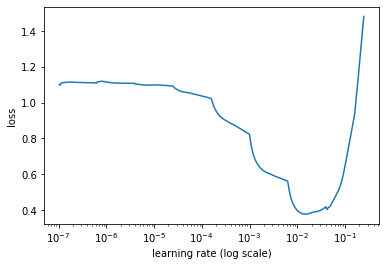

In [22]:
learner_nbsvm.lr_find(show_plot=True, max_epochs=10)

In [23]:
learner_nbsvm.lr_estimate()

(0.0055804094, 0.0015275646932423116)

In [24]:
learner_nbsvm.fit(learner_nbsvm.lr_estimate()[1], 10)

Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 0.6702 - accuracy: 0.7556 - val_loss: 0.6317 - val_accuracy: 0.7478
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4351 - accuracy: 0.8642 - val_loss: 0.5939 - val_accuracy: 0.7675
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 0.3531 - accuracy: 0.8971 - val_loss: 0.5865 - val_accuracy: 0.7703
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 0.3013 - accuracy: 0.9172 - val_loss: 0.5904 - val_accuracy: 0.7681
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2639 - accuracy: 0.9318 - val_loss: 0.6014 - val_accuracy: 0.7722
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2356 - accuracy: 0.9418 - val_loss: 0.6125 - val_accuracy: 0.7714
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2120 - accuracy: 0.9513 - val_loss: 0.6296 - val_accuracy: 0.7728
Epoch 

## Applying the bigru model: (mod_20)

In [25]:
bigru = text.text_classifier("bigru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
processing pretrained word vectors...
downloading pretrained word vectors to /root/ktrain_data ...
[██████████████████████████████████████████████████]
extracting pretrained word vectors...
done.

cleanup downloaded zip...
done.

loading pretrained word vectors...this may take a few moments...


done.


In [26]:
learner_bigru = ktrain.get_learner(bigru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 56s 110ms/step - loss: 1.1018 - accuracy: 0.3088
Epoch 2/10
450/450 [==============================] - 49s 109ms/step - loss: 1.1016 - accuracy: 0.3139
Epoch 3/10
450/450 [==============================] - 49s 109ms/step - loss: 1.0984 - accuracy: 0.3431
Epoch 4/10
450/450 [==============================] - 49s 108ms/step - loss: 1.0858 - accuracy: 0.4123
Epoch 5/10
450/450 [==============================] - 49s 109ms/step - loss: 0.9618 - accuracy: 0.5681
Epoch 6/10
450/450 [==============================] - 49s 109ms/step - loss: 0.5553 - accuracy: 0.7756
Epoch 7/10
450/450 [==============================] - 49s 109ms/step - loss: nan - accuracy: 0.7700
Epoch 8/10
450/450 [==============================] - 49s 108ms/step - loss: nan - accuracy: 0.3287
Epoch 9/10
450/450 [==============================] - 49s 108ms/step - loss: nan - accuracy: 0.3285

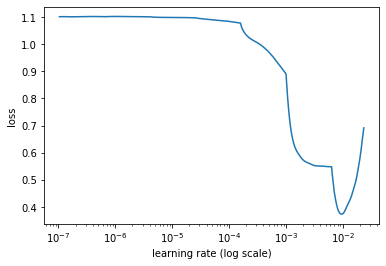

In [27]:
learner_bigru.lr_find(show_plot=True, max_epochs=10)

In [28]:
learner_bigru.lr_estimate()

(0.00087722426, 0.002319171652197838)

In [29]:
learner_bigru.fit(learner_bigru.lr_estimate()[1], 7)

Epoch 1/7
450/450 [==============================] - 54s 115ms/step - loss: 0.7053 - accuracy: 0.6822 - val_loss: 0.5370 - val_accuracy: 0.7811
Epoch 2/7
450/450 [==============================] - 52s 115ms/step - loss: 0.3163 - accuracy: 0.8826 - val_loss: 0.5413 - val_accuracy: 0.7978
Epoch 3/7
450/450 [==============================] - 52s 116ms/step - loss: 0.0719 - accuracy: 0.9790 - val_loss: 0.6046 - val_accuracy: 0.8225
Epoch 4/7
450/450 [==============================] - 53s 117ms/step - loss: 0.0107 - accuracy: 0.9987 - val_loss: 0.7298 - val_accuracy: 0.8142
Epoch 5/7
450/450 [==============================] - 52s 116ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.8067 - val_accuracy: 0.8125
Epoch 6/7
450/450 [==============================] - 52s 116ms/step - loss: 5.3230e-04 - accuracy: 1.0000 - val_loss: 0.8702 - val_accuracy: 0.8119
Epoch 7/7
450/450 [==============================] - 52s 116ms/step - loss: 2.9886e-04 - accuracy: 1.0000 - val_loss: 0.9224 - val_a

## Applying the standard gru: (mod_21)

In [30]:
stgru = text.text_classifier("standard_gru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [31]:
learner_stgru = ktrain.get_learner(stgru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 54s 115ms/step - loss: 1.0996 - accuracy: 0.3325
Epoch 2/10
450/450 [==============================] - 51s 114ms/step - loss: 1.1017 - accuracy: 0.3214
Epoch 3/10
450/450 [==============================] - 51s 114ms/step - loss: 1.1003 - accuracy: 0.3299
Epoch 4/10
450/450 [==============================] - 51s 114ms/step - loss: 1.0991 - accuracy: 0.3384
Epoch 5/10
450/450 [==============================] - 51s 113ms/step - loss: 1.0945 - accuracy: 0.3586
Epoch 6/10
450/450 [==============================] - 51s 114ms/step - loss: 1.0434 - accuracy: 0.4618
Epoch 7/10
450/450 [==============================] - 51s 112ms/step - loss: nan - accuracy: 0.3379
Epoch 8/10
450/450 [==============================] - 50s 112ms/step - loss: nan - accuracy: 0.3353
Epoch 9/10
450/450 [==============================] - 50s 112ms/step - loss: nan - accuracy: 0.3381

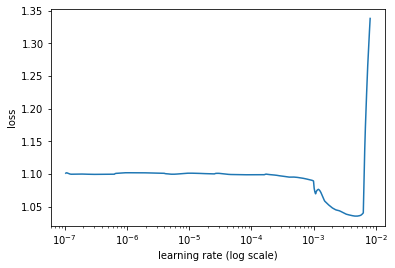

In [32]:
learner_stgru.lr_find(show_plot=True, max_epochs=10)

In [33]:
learner_stgru.lr_estimate()

(0.00088443555, 0.0008132454007863998)

In [34]:
learner_stgru.fit(learner_stgru.lr_estimate()[1], 10)

Epoch 1/10
450/450 [==============================] - 55s 118ms/step - loss: 1.0907 - accuracy: 0.3788 - val_loss: 1.0191 - val_accuracy: 0.4919
Epoch 2/10
450/450 [==============================] - 54s 120ms/step - loss: 0.9760 - accuracy: 0.5138 - val_loss: 1.1825 - val_accuracy: 0.4700
Epoch 3/10
450/450 [==============================] - 54s 120ms/step - loss: 0.8325 - accuracy: 0.6222 - val_loss: 0.7957 - val_accuracy: 0.6375
Epoch 4/10
450/450 [==============================] - 54s 120ms/step - loss: 0.6146 - accuracy: 0.7424 - val_loss: 0.6400 - val_accuracy: 0.7325
Epoch 5/10
450/450 [==============================] - 54s 119ms/step - loss: 0.4449 - accuracy: 0.8251 - val_loss: 0.6720 - val_accuracy: 0.7303
Epoch 6/10
450/450 [==============================] - 54s 120ms/step - loss: 0.3589 - accuracy: 0.8622 - val_loss: 0.5688 - val_accuracy: 0.7783
Epoch 7/10
450/450 [==============================] - 54s 119ms/step - loss: 0.2896 - accuracy: 0.8872 - val_loss: 0.6213 - val_ac